# ---------------------------------------------------------

# Code propre

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from skimage.morphology import remove_small_holes, remove_small_objects, disk, opening, closing


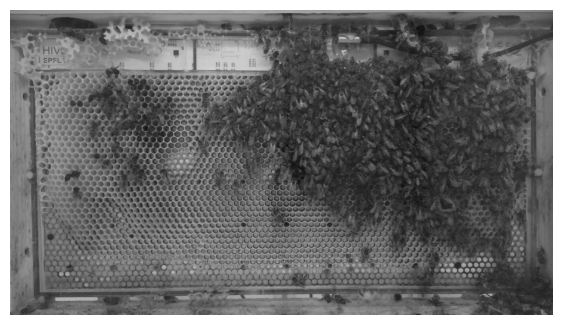

In [2]:
img = cv2.imread('winter_cluster_img/h2r1_s_2500_lp_2.5.jpg', cv2.IMREAD_GRAYSCALE)
fig, ax = plt.subplots(1, 1, figsize=(7, 7))
ax.imshow(img, cmap='gray')
ax.axis('off')
plt.show()

In [3]:
threshold = 80 #arbitrary for now

img_tmp = cv2.equalizeHist(img) #histogram equalization
img_tmp = cv2.GaussianBlur(img, (7, 7), 0) #blur cause it never caused any harm
_, img_tmp = cv2.threshold(img_tmp, threshold, 255, cv2.THRESH_BINARY) #thresholding


In [4]:
# some morphological operations (this take lil bit of time)
img_tmp1000 = remove_small_objects(img_tmp, min_size=1000) #remove small objects
img_tmp1000 = remove_small_holes(img_tmp1000, area_threshold=1000) #remove small holes
img_tmp1000_oc = closing(opening(img_tmp1000, disk(9)), disk(9)) #open then close the mask

/var/folders/81/88qz8hc518d6msz681nh39mm0000gn/T/ipykernel_25283/4073265152.py:3: UserWarning: Any labeled images will be returned as a boolean array. Did you mean to use a boolean array?
  img_tmp1000 = remove_small_holes(img_tmp1000, area_threshold=1000) #remove small holes


In [5]:
# to save time in the future, save the mask and load it
cv2.imwrite('mask.jpg', img_tmp1000_oc * 255)
img_tmp1000_oc = cv2.imread('mask.jpg', cv2.IMREAD_GRAYSCALE)

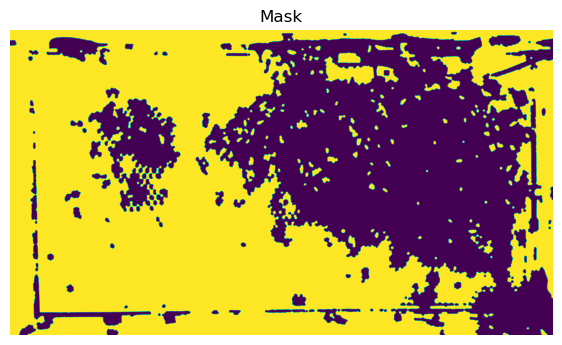

(2592, 4608)


In [6]:
# show the mask
fig, ax = plt.subplots(1, 1, figsize=(7, 7))
ax.imshow(img_tmp1000_oc)
ax.axis('off')
ax.set_title('Mask')
plt.show()
print(img_tmp1000_oc.shape)

In [7]:
# now we can find the contours
img_contour = img_tmp1000_oc.astype(np.uint8) #convert to uint8 because findContours only accepts uint8
contours, _ = cv2.findContours(img_contour, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE) #find contours
contour = max(contours, key=cv2.contourArea) #get the biggest contour
img_contour = cv2.cvtColor(img_contour, cv2.COLOR_GRAY2BGR) #convert to BGR because drawContours only accepts BGR
cv2.drawContours(img, contour, -1, (255, 255, 255), 20) #draw the biggest contour
print('Area of the biggest contour:', cv2.contourArea(contour), "pixels") #print the area of the biggest contour

Area of the biggest contour: 7521179.5 pixels


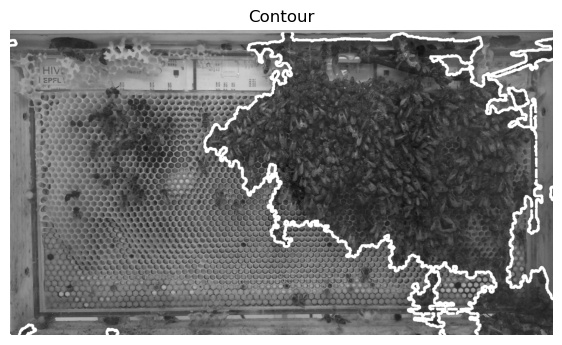

In [8]:
# show the contour
fig, ax = plt.subplots(1, 1, figsize=(7, 7))
ax.imshow(img, cmap='gray')
ax.axis('off')
ax.set_title('Contour')
plt.show()

In [9]:
# fill the contour 
